# Model Prototype

## Imports

### Libraries & Packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB

### Data

In [3]:
df = pd.read_csv("../raw_data/train.csv", nrows=100)

In [4]:
df = df.drop(columns=['ID', 'Place', 'location', 'date', 'status', 'job_title'])

In [5]:
df.head()

,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4.0,5.0,5.0,4.0,5.0,0,5.0
1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2.0,3.0,3.0,5.0,3.0,2094,5.0
2,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,4.0,5.0,5.0,4.0,949,5.0
3,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2.0,5.0,5.0,4.0,5.0,498,4.0
4,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5.0,5.0,5.0,5.0,5.0,0,4.0


## Models

### Baseline Model

In [6]:
text = df.summary + ' ' + df.positives + ' ' + df.negatives

df['text'] = text

df = df.dropna(axis=0)

df = df.drop_duplicates()

df.head()

,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall,text
1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2.0,3.0,3.0,5.0,3.0,2094,5.0,"Moving at the speed of light, burn out is inev..."
2,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,4.0,5.0,5.0,4.0,949,5.0,Great balance between big-company security and...
3,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2.0,5.0,5.0,4.0,5.0,498,4.0,The best place I've worked and also the most d...
10,Accountant,I like and learned from the beginning accounting,High clerical work in the Sane record,Management and Finance must be close relation ...,5.0,5.0,5.0,5.0,5.0,0,4.0,Accountant I like and learned from the beginni...
21,Make sure you know what role you're applying for,"Employees, food, benefits, perks, shuttle, bas...","Company has become way too vertical, performan...","Stop putting people on a bell curve, and recog...",4.0,4.0,5.0,5.0,2.0,0,5.0,Make sure you know what role you're applying f...


In [7]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df.text).toarray()

y = df.score_1.astype('uint8')

In [8]:
model = MultinomialNB()
model.fit(X, y)
model.score(X, y)

0.6818181818181818

### Model 

In [9]:
df = pd.read_csv("../raw_data/train.csv", nrows=100)

df = df.drop(columns=['ID', 'Place', 'location', 'date', 'status', 'job_title', 'score_6'])

In [10]:
# drop rows with na values in score cols
score_cols = ['score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'overall']
df = df.dropna(axis=0, subset=score_cols)
df = df.drop_duplicates()

In [11]:
# cast score cols as integers
float_cols = df.select_dtypes(float).columns
df[float_cols] = df[float_cols].astype('uint8')

In [12]:
df.head()

,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,overall
0,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4,5,5,4,5,5
1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2,3,3,5,3,5
2,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,4,5,5,4,5
3,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2,5,5,4,5,4
4,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5,5,5,5,5,4


In [13]:
df.summary.shape

(77,)

In [14]:
feature_cols = ['summary', 'positives', 'negatives', 'advice_to_mgmt']

# combine all text columns
df['text_combined'] = df[feature_cols].astype('U').agg(' '.join, axis=1)

feature_cols.append('text_combined')

In [15]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df.text_combined).toarray()
y = df.score_1

In [16]:
model = MultinomialNB()
model.fit(X, y)
# append predictions to df
df['text_combined_score_1'] = model.predict(X)

In [17]:
model.score(X,y)

0.6363636363636364

In [18]:
# iterate over features and append results to df as new cols

result_scores = {}

for feature in feature_cols:
    scores_dic = {}
    
    for score in score_cols:
        vectorizer = TfidfVectorizer()
        X = vectorizer.fit_transform(df[feature].astype('U'))
        y = df[score]
        model = MultinomialNB()
        model.fit(X, y)
        df[f'{feature}_{score}'] = model.predict(X)
        scores_dic[f'{score}'] = model.score(X, y)
        
    result_scores[f'{feature}'] = scores_dic

In [19]:
df.head()

,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,overall,...,advice_to_mgmt_score_2,advice_to_mgmt_score_3,advice_to_mgmt_score_4,advice_to_mgmt_score_5,advice_to_mgmt_overall,text_combined_score_2,text_combined_score_3,text_combined_score_4,text_combined_score_5,text_combined_overall
0,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4,5,5,4,5,5,...,5,5,5,5,4,5,5,5,5,5
1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2,3,3,5,3,5,...,5,5,5,3,5,5,5,5,4,5
2,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,4,5,5,4,5,...,5,5,5,4,5,5,5,5,4,5
3,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2,5,5,4,5,4,...,5,5,5,5,4,5,5,5,4,4
4,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5,5,5,5,5,4,...,5,5,5,5,4,5,5,5,5,4


In [20]:
result_scores

{'summary': {'score_1': 0.7142857142857143,
  'score_2': 0.7142857142857143,
  'score_3': 0.6623376623376623,
  'score_4': 0.7272727272727273,
  'score_5': 0.7402597402597403,
  'overall': 0.8181818181818182},
 'positives': {'score_1': 0.6363636363636364,
  'score_2': 0.6103896103896104,
  'score_3': 0.5844155844155844,
  'score_4': 0.7142857142857143,
  'score_5': 0.7402597402597403,
  'overall': 0.8701298701298701},
 'negatives': {'score_1': 0.6883116883116883,
  'score_2': 0.6103896103896104,
  'score_3': 0.6103896103896104,
  'score_4': 0.7142857142857143,
  'score_5': 0.7402597402597403,
  'overall': 0.8961038961038961},
 'advice_to_mgmt': {'score_1': 0.5454545454545454,
  'score_2': 0.6103896103896104,
  'score_3': 0.6103896103896104,
  'score_4': 0.7142857142857143,
  'score_5': 0.5064935064935064,
  'overall': 0.5064935064935064},
 'text_combined': {'score_1': 0.6363636363636364,
  'score_2': 0.6103896103896104,
  'score_3': 0.5714285714285714,
  'score_4': 0.7142857142857143,


In [21]:
# iterate over features and append results to df as new cols


scores_dic = {}
for score in score_cols:

    result_scores = {}
    for feature in feature_cols:
        vectorizer = TfidfVectorizer()
        X = vectorizer.fit_transform(df[feature].astype('U'))
        y = df[score]
        model = MultinomialNB()
        model.fit(X, y)
        df[f'{feature}_{score}'] = model.predict(X)
        result_scores[f'{feature}'] = model.score(X, y)
        
    scores_dic[f'{score}'] = result_scores

In [22]:
scores_df = pd.DataFrame(scores_dic).T

<AxesSubplot:>

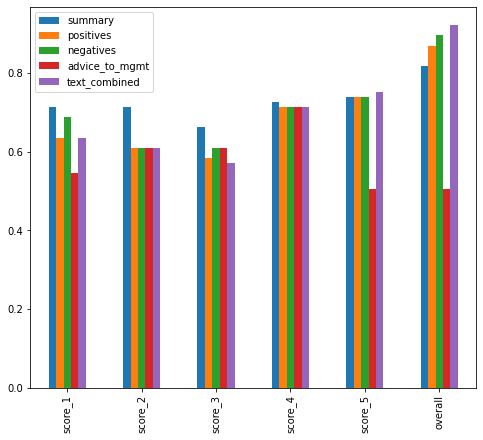

In [23]:
# visualise prediction capability of every text slice

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1,1,1)
scores_df.plot(kind='bar', ax=ax)

In [24]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

for feature in feature_cols:
    df[f'subjectivity_{feature}'] = df[feature].astype('U').apply(getSubjectivity)
    df[f'polarity_{feature}'] = df[feature].astype('U').apply(getPolarity)

In [25]:
# Create a function to get the total length of the reviews
def get_lengths(df):
    '''returns a df with columns with the length of the reviews'''
    func = lambda x: len(x) if type(x) == str else 0
    df['summary_length'] = df['summary'].apply(func)
    df['postives_length'] = df['positives'].apply(func)
    df['negatives_length'] = df['negatives'].apply(func)
    df['advice_length'] = df['advice_to_mgmt'].apply(func)
    df['combined_length'] = df['text_combined'].apply(func)
    return df

df = get_lengths(df)

In [26]:
# scale new features
length_cols = [col for col in df.columns if 'length' in col]

for col in length_cols:
    scaler = MinMaxScaler()
    df[col] = scaler.fit_transform(df[[col]])

In [27]:
# select X
X = df.iloc[:, 11:]

In [28]:
# scale score features
pred_scores_cols = [col for col in X.columns if 'score' in col and not 'reg' in col]

for col in pred_scores_cols:
    scaler = MinMaxScaler()
    X[col] = scaler.fit_transform(X[[col]])

In [29]:
# linear regression with just the predictions for each model
for col in score_cols:
    model = LinearRegression()
    model.fit(X, df[col])
    X[f'reg_{col}'] = model.predict(X)
    scaler = MinMaxScaler()
    X[f'reg_{col}'] = scaler.fit_transform(X[[f'reg_{col}']])
# classification with scores as targets
predictions = pd.DataFrame()
pred_scores = {}
for target in score_cols:
    model = LogisticRegression(max_iter=1000)
    y = df[target]
    model.fit(X, y)
    predictions[target] = model.predict(X)
    pred_scores[target] = model.score(X, y)
    

In [30]:
predictions

,score_1,score_2,score_3,score_4,score_5,overall
0,4,5,5,5,5,5
1,2,3,3,5,3,5
2,5,4,5,5,4,5
3,2,5,5,5,5,4
4,5,5,5,5,5,4
...,...,...,...,...,...,...
72,4,5,4,5,4,3
73,3,4,2,4,4,4
74,5,5,4,5,5,5
75,4,5,4,4,4,4


In [31]:
pred_scores

{'score_1': 0.961038961038961,
 'score_2': 0.8571428571428571,
 'score_3': 0.8181818181818182,
 'score_4': 0.8571428571428571,
 'score_5': 0.922077922077922,
 'overall': 0.961038961038961}

<BarContainer object of 6 artists>

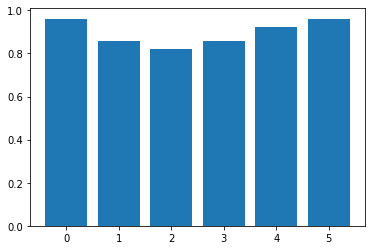

In [32]:
plt.bar(range(len(pred_scores)), list(pred_scores.values()), align='center')

## Feature engineering

In [33]:
# Get data with our own functions, train & test splits
from WorkforceSentimentMonitoring.data import get_data, merge, holdout

submission, train, test = get_data()

display(submission.head())
display(train.head())
display(test.head())

,ID,overall
0,5,5
1,6,4
2,7,4
3,8,5
4,9,5


,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,1,startup_1,NaN,"Dec 11, 2018",Current Employee,Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4.0,5.0,5.0,4.0,5.0,0,5.0
1,2,startup_1,"Mountain View, CA","Jun 21, 2013",Former Employee,Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2.0,3.0,3.0,5.0,3.0,2094,5.0
2,3,startup_1,"New York, NY","May 10, 2014",Current Employee,Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,4.0,5.0,5.0,4.0,949,5.0
3,4,startup_1,"Mountain View, CA","Feb 8, 2015",Current Employee,Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2.0,5.0,5.0,4.0,5.0,498,4.0
4,10,startup_1,NaN,"Dec 9, 2018",Current Employee,Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5.0,5.0,5.0,5.0,5.0,0,4.0


,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6
0,5,startup_1,"Los Angeles, CA","Jul 19, 2018",Former Employee,Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,49
1,6,startup_1,"Mountain View, CA","Dec 9, 2018",Former Employee,SDE2,NICE working in GOOGLE as an INTERN,"People are not that busy, so they are nice to ...",Food is not good as I expected. People said it...,NaN,4,4,4,5,4,1
2,7,startup_1,"New York, NY","Dec 11, 2018",Current Employee,Software Engineer,Software engineer,Great working environment. Good work life balance,Usual big company problems. Hierarchy.,NaN,5,4,4,5,4,0
3,8,startup_1,NaN,"Dec 11, 2018",Former Employee,Anonymous Employee,great place to work and progress,"work culture, benefits, growth, people,",No cons that i can think of,NaN,5,5,5,5,5,0
4,9,startup_1,"New York, NY","Dec 10, 2018",Current Employee,Anonymous Employee,Google Surpasses Realistic Expectations,Great products. Vision you can feel good about...,Younger employees complaining about the compan...,NaN,5,5,5,5,5,0


In [34]:
# merge corresponding dataframes
df = merge(submission, train, test)

In [35]:
df.head()

,summary,positives,negatives,advice_to_mgmt,work-balance,culture-values,career-opportunities,comp-benefits,senior-mgmt,overall,review
0,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4,5,5,4,5,5,Best Company to work for People are smart and ...
1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2,3,3,5,3,5,"Moving at the speed of light, burn out is inev..."
2,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,4,5,5,4,5,Great balance between big-company security and...
3,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2,5,5,4,5,4,The best place I've worked and also the most d...
4,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5,5,5,5,5,4,Execellent for engineers Impact driven. Best t...


In [36]:
# extract review lengths
def get_lengths(df):
    '''returns a df with columns with the length of the reviews'''
    func = lambda x: len(x) if type(x) == str else 0
    df['summary_length'] = df['summary'].apply(func)
    df['postives_length'] = df['positives'].apply(func)
    df['negatives_length'] = df['negatives'].apply(func)
    df['advice_length'] = df['advice_to_mgmt'].apply(func)
    df['review_length'] = df['review'].apply(func)
    return df
df = get_lengths(df)

In [37]:
df.head()

,summary,positives,negatives,advice_to_mgmt,work-balance,culture-values,career-opportunities,comp-benefits,senior-mgmt,overall,review,summary_length,postives_length,negatives_length,advice_length,review_length
0,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4,5,5,4,5,5,Best Company to work for People are smart and ...,24,29,34,0,93
1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2,3,3,5,3,5,"Moving at the speed of light, burn out is inev...",52,1048,2403,1004,4510
2,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,4,5,5,4,5,Great balance between big-company security and...,72,3634,1064,56,4829
3,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2,5,5,4,5,4,The best place I've worked and also the most d...,55,1572,2614,295,4539
4,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5,5,5,5,5,4,Execellent for engineers Impact driven. Best t...,24,38,62,0,130


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52815 entries, 0 to 29271
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   summary               52734 non-null  object
 1   positives             52815 non-null  object
 2   negatives             52814 non-null  object
 3   advice_to_mgmt        30132 non-null  object
 4   work-balance          52815 non-null  uint8 
 5   culture-values        52815 non-null  uint8 
 6   career-opportunities  52815 non-null  uint8 
 7   comp-benefits         52815 non-null  uint8 
 8   senior-mgmt           52815 non-null  uint8 
 9   overall               52815 non-null  uint8 
 10  review                52815 non-null  object
 11  summary_length        52815 non-null  int64 
 12  postives_length       52815 non-null  int64 
 13  negatives_length      52815 non-null  int64 
 14  advice_length         52815 non-null  int64 
 15  review_length         52815 non-null

In [39]:
# preprocess text cols
text_columns = df.select_dtypes('object').columns

In [40]:
from WorkforceSentimentMonitoring.preprocessing import preprocessing

In [49]:
df[text_columns] = df[text_columns].astype('U').applymap(preprocessing)

In [50]:
# change order of columns so text cols are on the left
df = df[['summary', 'positives', 'negatives', 'advice_to_mgmt', 'review',
        'work-balance','culture-values', 'career-opportunities', 'comp-benefits',
        'senior-mgmt', 'overall', 'summary_length', 'postives_length',
        'negatives_length', 'advice_length', 'review_length']]

In [51]:
df.head()

,summary,positives,negatives,advice_to_mgmt,review,work-balance,culture-values,career-opportunities,comp-benefits,senior-mgmt,overall,summary_length,postives_length,negatives_length,advice_length,review_length
0,best company work,people smart friendly,bureaucracy slowing thing,nan,best company work people smart friendly bureau...,4,5,5,4,5,5,24,29,34,0,93
1,moving speed light burn inevitable,food food food cafe main campus mtv alone mini...,work life balance balance perk benefit illusio...,dismiss emotional intelligence adaptive leader...,moving speed light burn inevitable food food f...,2,3,3,5,3,5,52,1048,2403,1004,4510
2,great balance big company security fun fast mo...,software engineer among king hill google engin...,becoming larger come growing pain bureaucracy ...,keep focus user everything else follow,great balance big company security fun fast mo...,5,4,5,5,4,5,72,3634,1064,56,4829
3,best place worked also demanding,find well regarded company actually deserves h...,live sf commute take hour hour way shuttle som...,keep micromanaging huge benefit google u huge ...,best place worked also demanding find well reg...,2,5,5,4,5,4,55,1572,2614,295,4539
4,execellent engineer,impact driven best tech world,size matter engineer bit disconnected customer,nan,execellent engineer impact driven best tech wo...,5,5,5,5,5,4,24,38,62,0,130


In [53]:
score_cols = ['work-balance', 'culture-values', 'career-opportunities',
              'comp-benefits', 'senior-mgmt', 'overall']
feature_cols = ['summary', 'positives', 'negatives', 'advice_to_mgmt', 'review']

In [146]:
# holdout
X_train, X_test, y_train, y_test = holdout(df, score_cols)

In [156]:
# reset index after holdout
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [148]:
X_train.head()

,summary,positives,negatives,advice_to_mgmt,review,summary_length,postives_length,negatives_length,advice_length,review_length
0,senior advisor,corporate company wonderful powerful force wor...,manager manager level view employee problem asset,view employee broken replaceable number people...,senior advisor corporate company wonderful pow...,14,90,79,137,323
1,solid job though time consuming college student,loved work fast pace exciting,repetitive fit well school schedule,nan,solid job though time consuming college studen...,55,51,56,0,168
2,microsoft company,good work life balance used good talent,leadership slow new trend tech area good talen...,need refreshment manager big increase compensa...,microsoft company good work life balance used ...,17,53,86,83,242
3,excellent place learn,pro would work life balance,learning comp structure leadership principle l...,work life balance,excellent place learn pro would work life bala...,24,36,56,17,136
4,amazon,working good people plenty overtime peak seaso...,performance expectation unrealistic term volum...,factor bathroom break determining rate,amazon working good people plenty overtime pea...,6,83,93,48,233


In [149]:
y_train

,work-balance,culture-values,career-opportunities,comp-benefits,senior-mgmt,overall
0,2,3,2,3,1,4
1,5,3,5,5,4,4
2,4,2,2,2,2,4
3,2,5,5,5,3,3
4,2,4,3,3,3,3
...,...,...,...,...,...,...
36965,1,4,4,1,3,3
36966,5,5,5,5,5,4
36967,2,3,1,2,1,1
36968,4,4,4,4,4,4


In [151]:
# implement add_multinomial_nb_prediction_feature function, look below graph
df_tmp = X_test.copy()
y_tmp = y_test.copy()
scores_dic = {}
feature_cols = ['summary', 'positives', 'negatives', 'advice_to_mgmt', 'review']
for score in y_tmp.columns:
    result_scores = {}
    for feature in feature_cols:
        vectorizer = TfidfVectorizer()
        X = vectorizer.fit_transform(df_tmp[feature])
        target = y_tmp[score]
        model = MultinomialNB()
        model.fit(X, target)
        df_tmp[f'{feature}_{score}'] = model.predict(X)
        result_scores[f'{feature}'] = model.score(X, target)
    
    scores_dic[f'{score}'] = result_scores

scores_df = pd.DataFrame(scores_dic)

<AxesSubplot:>

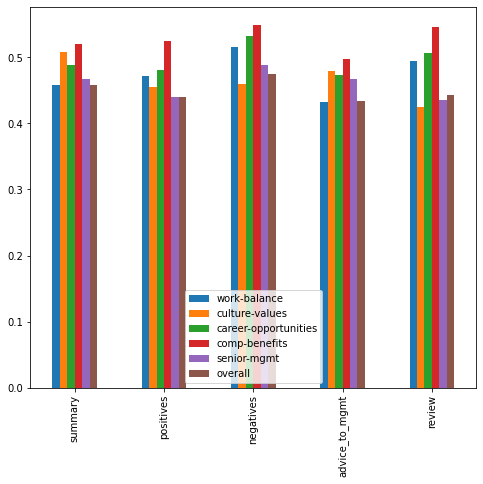

In [153]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1,1,1)
scores_df.plot(kind='bar', ax=ax)

In [154]:
# vectorize and predict with Naive Bayes 
def add_multinomial_nb_prediction_feature(df, y):
    feature_cols = ['summary', 'positives', 'negatives', 'advice_to_mgmt', 'review']
    for score in y.columns:
        for feature in feature_cols:
            vectorizer = TfidfVectorizer()
            X = vectorizer.fit_transform(df[feature])
            target = y[score]
            model = MultinomialNB()
            model.fit(X, target)
            df[f'{feature}_{score}_nb'] = model.predict(X)
    return df

In [155]:
X_train = add_multinomial_nb_prediction_feature(X_train, y_train)

X_test = add_multinomial_nb_prediction_feature(X_test, y_test)


In [158]:
from WorkforceSentimentMonitoring.feature_engineering import get_subjectivity_polarity_columns
# extract subjectivity and polarity
X_train = get_subjectivity_polarity_columns(X_train)
X_test = get_subjectivity_polarity_columns(X_test)


In [159]:
# Scale Features when needed

columns_to_scale = [col for col in X_train.select_dtypes(exclude='object').columns \
                    if X_train[col].max() > 1 or X_train[col].min() < -1]

scaler = MinMaxScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

display(X_train.head(1))
display(X_test.head(1))

,summary,positives,negatives,advice_to_mgmt,review,summary_length,postives_length,negatives_length,advice_length,review_length,...,subjectivity_summary,polarity_summary,subjectivity_positives,polarity_positives,subjectivity_negatives,polarity_negatives,subjectivity_advice_to_mgmt,polarity_advice_to_mgmt,subjectivity_review,polarity_review
0,senior advisor,corporate company wonderful powerful force wor...,manager manager level view employee problem asset,view employee broken replaceable number people...,senior advisor corporate company wonderful pow...,0.116667,0.009677,0.005522,0.024027,0.013657,...,0.0,0.0,0.6875,0.525,0.0,0.0,0.4,-0.4,0.63,0.34


,summary,positives,negatives,advice_to_mgmt,review,summary_length,postives_length,negatives_length,advice_length,review_length,...,subjectivity_summary,polarity_summary,subjectivity_positives,polarity_positives,subjectivity_negatives,polarity_negatives,subjectivity_advice_to_mgmt,polarity_advice_to_mgmt,subjectivity_review,polarity_review
0,competitive challenging,ability work exciting project part cutting edg...,internal review process calibrated peer someon...,focus retention minority,competitive challenging ability work exciting ...,0.266667,0.008574,0.011416,0.008769,0.013704,...,1.0,0.5,0.85,-0.15,0.25,-0.25,0.0,0.0,0.64,-0.06


In [173]:
# implement above scaling as a function
def minmax_when_needed(X_train, X_test):
    ''' Select columns with values that need scaling – outside of range(-1, 1)
        and apply a MinMax scaler'''
    # select columns the columns that need scaling
    columns_to_scale = [col for col in X_train.select_dtypes(exclude='object').columns \
                        if X_train[col].max() > 1 or X_train[col].min() < -1]
    # instantiate scaler
    scaler = MinMaxScaler()
    # fit & transform train set, reassign
    X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
    # transform test set, reassign
    X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
    
    return X_train, X_test

In [162]:
# drop text columns to feed to the linear regression model in order to extract feature
X_train.drop(columns=feature_cols, inplace=True)
X_test.drop(columns=feature_cols, inplace=True)

In [163]:
score_cols

['work-balance',
 'culture-values',
 'career-opportunities',
 'comp-benefits',
 'senior-mgmt',
 'overall']

In [167]:
# function to extract the feature with the predictions of linear regression

def get_linear_regression_cols(X_train, X_test, y_train):
    """linear regression with just the predictions for each model"""
    # iterate over the targets and instantiate, fit one model for each target
    for col in score_cols:
        # instantiate model
        model = LinearRegression()
        # fit model with train set
        model.fit(X_train, y_train[col])
        # predict and add values to new column (train set)
        X_train[f'{col}_regression'] = model.predict(X_train)
        # predict and add values to new column (test set), is this correct??
        # should I instantiate and fit a new model??
        X_test[f'{col}_regression'] = model.predict(X_test)
        
    return X_train, X_test

In [168]:
X_train, X_test = get_linear_regression_cols(X_train, X_test, y_train)

In [172]:
display(X_train.head(2))
display(X_test.head(2))

,summary_length,postives_length,negatives_length,advice_length,review_length,summary_work-balance_nb,positives_work-balance_nb,negatives_work-balance_nb,advice_to_mgmt_work-balance_nb,review_work-balance_nb,...,subjectivity_advice_to_mgmt,polarity_advice_to_mgmt,subjectivity_review,polarity_review,work-balance_regression,culture-values_regression,career-opportunities_regression,comp-benefits_regression,senior-mgmt_regression,overall_regression
0,0.116667,0.009677,0.005522,0.024027,0.013657,0.5,1.0,0.5,0.25,0.50,...,0.4,-0.4,0.630000,0.340,2.891623,3.896793,3.611024,4.264456,3.646980,3.706543
1,0.458333,0.004900,0.003805,0.000000,0.006383,0.5,0.5,0.5,1.00,0.75,...,0.0,0.0,0.491667,0.225,2.838899,3.927538,3.864560,4.299344,3.728245,3.774048


,summary_length,postives_length,negatives_length,advice_length,review_length,summary_work-balance_nb,positives_work-balance_nb,negatives_work-balance_nb,advice_to_mgmt_work-balance_nb,review_work-balance_nb,...,subjectivity_advice_to_mgmt,polarity_advice_to_mgmt,subjectivity_review,polarity_review,work-balance_regression,culture-values_regression,career-opportunities_regression,comp-benefits_regression,senior-mgmt_regression,overall_regression
0,0.266667,0.008574,0.011416,0.008769,0.013704,0.75,0.50,0.5,0.5,0.5,...,0.0,0.0,0.640000,-0.060000,2.519921,3.653538,4.109148,3.808661,3.404716,3.633057
1,0.125000,0.008452,0.016117,0.019642,0.018726,0.50,0.75,1.0,1.0,0.5,...,0.5,0.5,0.441667,0.277778,4.130715,4.154780,4.158239,4.183433,3.869024,4.003784


In [174]:
# Scale predictions from regression
X_train, X_test = minmax_when_needed(X_train, X_test)

## Model

In [178]:
score_cols

['work-balance',
 'culture-values',
 'career-opportunities',
 'comp-benefits',
 'senior-mgmt',
 'overall']

In [180]:
prediction_scores = {}
for target in score_cols:
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train[target])
    prediction_scores[target] = model.score(X_test, y_test[target])

In [182]:
prediction_scores

{'work-balance': 0.514988955506469,
 'culture-values': 0.5709056484695487,
 'career-opportunities': 0.5796781319028085,
 'comp-benefits': 0.6002524455664248,
 'senior-mgmt': 0.5516566740296623,
 'overall': 0.5391606184916378}

In [183]:
from tqdm import tqdm
from time import sleep

In [188]:
for target in tqdm(score_cols):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train[target])
    prediction_scores[target] = model.score(X_test, y_test[target])

100%|██████████| 6/6 [01:43<00:00, 17.23s/it]
